# Lesson 2: Sequential Chats and Customer Onboarding

- Leverage multi agent design to finish task involving multiple steps .
- Building a sequence of tasks between multiple agents who collaborfate to provide customer onboarding experience for a product
- Also experience how humans could be seamlessly involved in loop of AI system.

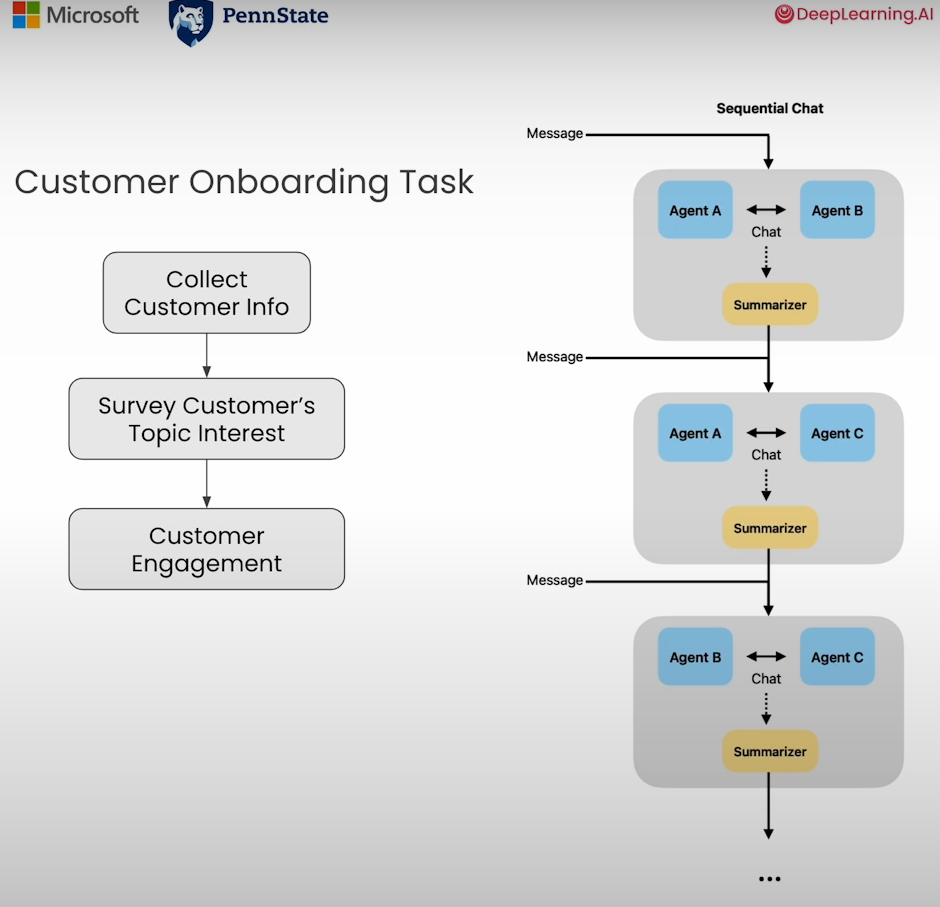

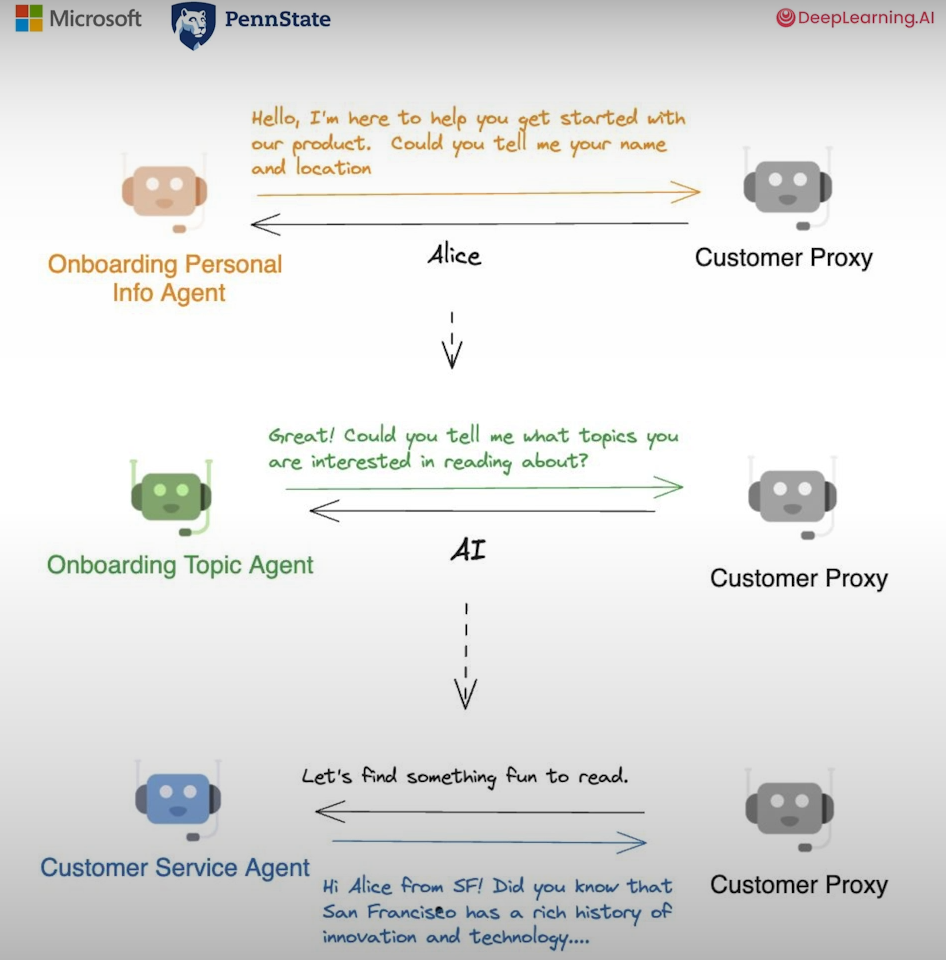

## Setup

In [1]:
llm_config={"model": "gpt-3.5-turbo"}

In [2]:
from autogen import ConversableAgent

## Creating the needed agents

In [3]:
onboarding_personal_information_agent = ConversableAgent(
    name="Onboarding Personal Information Agent",
    system_message='''You are a helpful customer onboarding agent,
    you are here to help new customers get started with our product.
    Your job is to gather customer's name and location.
    Do not ask for other information. Return 'TERMINATE' 
    when you have gathered all the information.''',
    llm_config=llm_config,
    code_execution_config=False,
    human_input_mode="NEVER",  # it means human are not in loop for this agent as manually in this use case we are not entering any i
)

In [4]:
onboarding_topic_preference_agent = ConversableAgent(
    name="Onboarding Topic preference Agent",
    system_message='''You are a helpful customer onboarding agent,
    you are here to help new customers get started with our product.
    Your job is to gather customer's preferences on news topics.
    Do not ask for other information.
    Return 'TERMINATE' when you have gathered all the information.''',
    llm_config=llm_config,
    code_execution_config=False,
    human_input_mode="NEVER",
)

In [5]:
customer_engagement_agent = ConversableAgent(
    name="Customer Engagement Agent",
    system_message='''You are a helpful customer service agent
    here to provide fun for the customer based on the user's
    personal information and topic preferences.
    This could include fun facts, jokes, or interesting stories.
    Make sure to make it engaging and fun!
    Return 'TERMINATE' when you are done.''',
    llm_config=llm_config,
    code_execution_config=False,
    human_input_mode="NEVER",
    is_termination_msg=lambda msg: "terminate" in msg.get("content").lower(),
)

In [6]:
# customer proxy agent to act  as a proxy for the real customer 
customer_proxy_agent = ConversableAgent(
    name="customer_proxy_agent",
    llm_config=False,
    code_execution_config=False,
    human_input_mode="ALWAYS", # this proxy agent always take human ip from real customer
    is_termination_msg=lambda msg: "terminate" in msg.get("content").lower(),
)

## Creating tasks

Now, you can craft a series of tasks to facilitate the onboarding process.

In [7]:
# sequence of chats
# in sequential chat scenario , tasks depend upon each other , therefore when they want to summarize information
# from the pvs chat to be used in next chat 
chats = [
    {
        "sender": onboarding_personal_information_agent,
        "recipient": customer_proxy_agent,
        "message": 
            "Hello, I'm here to help you get started with our product."
            "Could you tell me your name and location?",
        "summary_method": "reflection_with_llm",
        "summary_args": {
            "summary_prompt" : "Return the customer information "
                             "into as JSON object only: "
                             "{'name': '', 'location': ''}",
        },
        "max_turns": 2,
        "clear_history" : True
    },
    {
        "sender": onboarding_topic_preference_agent,
        "recipient": customer_proxy_agent,
        "message": 
                "Great! Could you tell me what topics you are "
                "interested in reading about?",
        "summary_method": "reflection_with_llm",
        "max_turns": 1,
        "clear_history" : False
    },
    {
        "sender": customer_proxy_agent,
        "recipient": customer_engagement_agent,
        "message": "Let's find something fun to read.",
        "max_turns": 1,
        "summary_method": "reflection_with_llm",
    },
]

## Start the onboarding process

**Note**: You might get a slightly different response than what's shown in the video. Feel free to try different inputs, such as name, location, and preferences.

In [8]:
from autogen import initiate_chats

chat_results = initiate_chats(chats)


********************************************************************************
Starting a new chat....

********************************************************************************
Onboarding Personal Information Agent (to customer_proxy_agent):

Hello, I'm here to help you get started with our product.Could you tell me your name and location?

--------------------------------------------------------------------------------


/usr/local/lib/python3.11/site-packages/autogen/agentchat/chat.py:47: UserWarning: Repetitive recipients detected: The chat history will be cleared by default if a recipient appears more than once. To retain the chat history, please set 'clear_history=False' in the configuration of the repeating agent.
  warnings.warn(


Provide feedback to Onboarding Personal Information Agent. Press enter to skip and use auto-reply, or type 'exit' to end the conversation: sumit , odisha
customer_proxy_agent (to Onboarding Personal Information Agent):

sumit , odisha

--------------------------------------------------------------------------------
Onboarding Personal Information Agent (to customer_proxy_agent):

Great! Thank you for providing that information. If there's anything else you need help with, feel free to ask.

--------------------------------------------------------------------------------
Provide feedback to Onboarding Personal Information Agent. Press enter to skip and use auto-reply, or type 'exit' to end the conversation: exit

********************************************************************************
Starting a new chat....

********************************************************************************
Onboarding Topic preference Agent (to customer_proxy_agent):

Great! Could you tell me what

## Print out the summary

In [9]:
for chat_result in chat_results:
    print(chat_result.summary)
    print("\n")

{
  "name": "sumit",
  "location": "odisha"
}


The user is interested in reading about Lord Jagannath.


Learn about Lord Jagannath and the famous Rath Yatra at the Jagannath Temple in Puri, Odisha, where the siblings Lord Jagannath, Balabhadra, and Subhadra are taken out in grand processions on elaborately decorated chariots. It's a spectacular event that attracts devotees from all over the world.




## Print out the cost

In [10]:
for chat_result in chat_results:
    print(chat_result.cost)
    print("\n")

{'usage_including_cached_inference': {'total_cost': 0.00015900000000000002, 'gpt-3.5-turbo-0125': {'cost': 0.00015900000000000002, 'prompt_tokens': 192, 'completion_tokens': 42, 'total_tokens': 234}}, 'usage_excluding_cached_inference': {'total_cost': 0.00015900000000000002, 'gpt-3.5-turbo-0125': {'cost': 0.00015900000000000002, 'prompt_tokens': 192, 'completion_tokens': 42, 'total_tokens': 234}}}


{'usage_including_cached_inference': {'total_cost': 5.6e-05, 'gpt-3.5-turbo-0125': {'cost': 5.6e-05, 'prompt_tokens': 76, 'completion_tokens': 12, 'total_tokens': 88}}, 'usage_excluding_cached_inference': {'total_cost': 5.6e-05, 'gpt-3.5-turbo-0125': {'cost': 5.6e-05, 'prompt_tokens': 76, 'completion_tokens': 12, 'total_tokens': 88}}}


{'usage_including_cached_inference': {'total_cost': 0.000548, 'gpt-3.5-turbo-0125': {'cost': 0.000548, 'prompt_tokens': 361, 'completion_tokens': 245, 'total_tokens': 606}}, 'usage_excluding_cached_inference': {'total_cost': 0.000548, 'gpt-3.5-turbo-0125': {

- In this lesson we have learned how to use sequential chats to finish a sequence of dependant tasks.
- In the next lesson you will learn, how to realize the reflection agentic design pattern with nested chat. Where a chat or sequence of chats are nested within anathor chat as in monologue of the agent. 